## **Introducción a Regresión Lineal Simple y Múltiple**

### **1. Importar librerías de Python 😋**

In [ ]:
##Cargar librerías de base pip install nombrelibreria - terminal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **2. Funciones de uso general 😋**

In [ ]:
### Función cargar data sea .csv o .xlsx
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext, skiprows=5)
        return data
    else:
        print('Extensión Diferente')

## Función para datos NAN -> Null -> 0 (IRQ) -> NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%70s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%70s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

## Numérico = Media o Mediana (NAN) - Histograma(Numerica) - Mediana - Forma de Campana(Media)
## Categórico o Texto = Moda (Valor mas se repite) // SMOTE (Genera data sintética)
def histogramplot(df, nomCol, anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

##Función para Imputación de datos NAN con la media o mediana
def imputacionNA(df, nomCol, param):
    if param == 'media':
        df[nomCol]= df[nomCol].fillna(df[nomCol].mean())
        return df[nomCol]
    else:
        df[nomCol]= df[nomCol].fillna(df[nomCol].median())
        return df[nomCol]

## Función para revisar datos Categóricos
def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

##Función de reemplazo con base en patrón
def imputCat(df, nomCol, busqueda, reempl):
    df[nomCol] = np.where(df[nomCol]== busqueda, reempl, df[nomCol])
    return df[nomCol]

##FUncion reemplazo de datos categóricos NAN
def imputacionCatNA(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]

##Función para cambiar de texto a numero variable
def cambioTextNum(df, nomCol, tipo):
    df[nomCol] = df[nomCol].astype(tipo)
    return df[nomCol]

##Funcion para binarizar variables categóricas 2 opciones
def cambTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol]==busqueda, camuno, camdos)
    return df[nomCol]


##Función cambiar encabezados
def cambEncab(df, ListaN):
    df.columns = ListaN
    return df

from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

##Diagrama de correlacion
def DiagCorr(df, tamuno, tamdos):
    f, ax = plt.subplots(figsize=(tamuno,tamdos))
    sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.5, ax=ax)

##Funcion de extracción
def export(df, nombre, sepa, indice):
    data = df.to_csv(nombre, sep=sepa, index= indice)
    return data

### **3. Importar datos 😋**

In [ ]:
data = importDatos('/content/drive/MyDrive/DATOS/', 'EnfermedadesGuatemala2015', '.xlsx')

data.head()

,Código Departamento,Departamento,Código Municipio,Municipio,Hombres,% Hombres,Mujeres,% Mujeres,Total,Número de casos Diarrea,"Tasa específica de morbilidad x 100,000 habitantes","Casos de DENGUE por 100,000 habitantes",Total.1
0,4,Chimaltenango,411,Acatenango,11722,0.641177,12243,0.669675,18282,828.0,4529.044962,10.999890,4540.044852
1,22,Jutiapa,2204,Agua Blanca,8415,0.202250,6460,0.155262,41607,1574.0,3783.017281,81.000000,3864.017281
2,13,Huehuetenango,1327,Aguacatán,24532,0.689644,33092,0.930282,35572,3002.0,8439.221860,81.000000,8520.221860
3,9,Quetzaltenango,913,Almolonga,8633,0.346206,10940,0.438723,24936,81.0,324.831569,81.000000,405.831569
4,3,Sacatepéquez,314,Alotenango,16261,0.210864,16203,0.210112,77116,867.0,1124.280305,572.942336,1697.222641


### **4. Conocimiento de la data, Limpieza, Normalización, Test de Normalidad y Correlaciones 😋**

In [ ]:
datos_NAN(data)

Dimesiones: 340 filas, 13 columnas
Total de Valores NAN: 1
                                                        Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                                  Código Departamento       int64          22          0
                                                          Departamento     object          25          0
                                                      Código Municipio      int64         340          0
                                                             Municipio     object         334          0
                                                               Hombres      int64         339          0
                                                             % Hombres    float64         340          0
                                                               Mujeres      int64         339          0
                                                             % Mujeres    float64         340  

,count,mean,std,min,25%,50%,75%,max
Código Departamento,340.0,11.100000,5.825536,1.000000,6.750000,12.000000,15.000000,22.000000
Código Municipio,340.0,1106.623529,596.990377,20.000000,609.750000,1204.500000,1505.250000,2217.000000
Hombres,340.0,23802.270588,36700.751770,1480.000000,7378.750000,14651.500000,26671.250000,466492.000000
% Hombres,340.0,0.488374,0.246494,0.022367,0.280488,0.488657,0.692350,0.981735
Mujeres,340.0,24890.544118,39370.076573,1333.000000,7851.250000,15298.000000,27913.250000,527849.000000
% Mujeres,340.0,0.513390,0.258002,0.023415,0.281917,0.502156,0.711739,1.110861
Total,340.0,48756.805882,54467.664643,4480.000000,22535.000000,35504.500000,56012.750000,540028.000000
Número de casos Diarrea,339.0,2619.371681,6820.430588,0.000000,557.500000,1337.000000,2713.500000,102971.000000
"Tasa específica de morbilidad x 100,000 habitantes",340.0,5384.533845,7996.737308,0.000000,1559.565716,3801.224412,6561.993688,118025.598483
"Casos de DENGUE por 100,000 habitantes",340.0,118.479586,172.313798,0.616519,57.093502,81.000000,81.452375,1874.824707


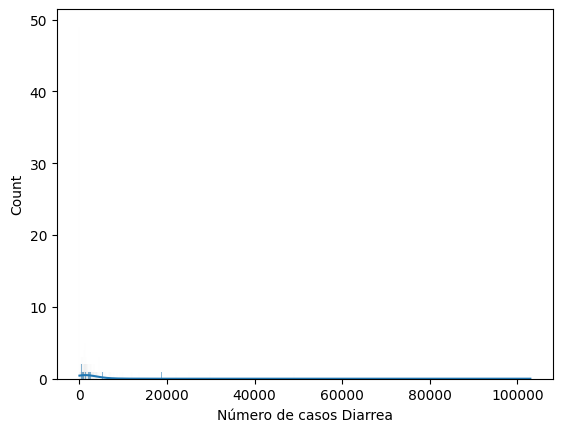

In [ ]:
##Limpiar primero los datos NAN luego pasamos a datos inconsistentes - Número de casos Diarrea
histogramplot(data, 'Número de casos Diarrea',10)

##Debido a que los datos están complicados para gráficar realizamos las estadísticas describe para ver
##su desviación estándar
data.describe().T

##al estar distante la media de la mediana se asume que no es normal -> mediana para imputación


In [ ]:
###Limpieza de dato NAN
data['Número de casos Diarrea'] = imputacionNA(data, 'Número de casos Diarrea', 'mediana')

datos_NAN(data)

Dimesiones: 340 filas, 13 columnas
Total de Valores NAN: 0
                                                        Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                                  Código Departamento       int64          22          0
                                                          Departamento     object          25          0
                                                      Código Municipio      int64         340          0
                                                             Municipio     object         334          0
                                                               Hombres      int64         339          0
                                                             % Hombres    float64         340          0
                                                               Mujeres      int64         339          0
                                                             % Mujeres    float64         340  

In [ ]:
##Revisión de datos inconsistentes - Cambiar los nombres de departamento

data['Departamento'].value_counts()

,count
Departamento,
Huehuetenango,33
San Marcos,30
Quetzaltenango,24
Suchitepéquez,21
Quiché,20
Sololá,19
Guatemala,17
Jutiapa,17
Chimaltenango,16


In [ ]:
##cambiar los datos inconsistentes
data['Departamento'] = imputCat(data, 'Departamento','Peténnnnn','Petén')

data['Departamento'] = imputCat(data, 'Departamento','Alta Verapáz','Alta Verapaz')

data['Departamento'] = imputCat(data, 'Departamento','Quiché..…','Quiché')

data['Departamento'].value_counts()

,count
Departamento,
Huehuetenango,33
San Marcos,30
Quetzaltenango,24
Quiché,21
Suchitepéquez,21
Sololá,19
Alta Verapaz,17
Guatemala,17
Jutiapa,17


In [ ]:
##revisando municipio
data['Municipio'].value_counts()

,count
Municipio,
San Pedro Sacatepéquez,2
Santa Bárbara,2
San José,2
La Democracia,2
San Lorenzo,2
...,...
Melchor De Mencos,1
Mazatenango,1
Mataquescuintla,1


In [ ]:
##revisión del total - de hombres mas mujeres
data.head()

,Código Departamento,Departamento,Código Municipio,Municipio,Hombres,% Hombres,Mujeres,% Mujeres,Total,Número de casos Diarrea,"Tasa específica de morbilidad x 100,000 habitantes","Casos de DENGUE por 100,000 habitantes",Total.1
0,4,Chimaltenango,411,Acatenango,11722,0.641177,12243,0.669675,18282,828.0,4529.044962,10.999890,4540.044852
1,22,Jutiapa,2204,Agua Blanca,8415,0.202250,6460,0.155262,41607,1574.0,3783.017281,81.000000,3864.017281
2,13,Huehuetenango,1327,Aguacatán,24532,0.689644,33092,0.930282,35572,3002.0,8439.221860,81.000000,8520.221860
3,9,Quetzaltenango,913,Almolonga,8633,0.346206,10940,0.438723,24936,81.0,324.831569,81.000000,405.831569
4,3,Sacatepéquez,314,Alotenango,16261,0.210864,16203,0.210112,77116,867.0,1124.280305,572.942336,1697.222641


In [ ]:
##Corrección del Total de hombres y mujeres
data['Total'] = data['Hombres']+ data['Mujeres']

data.head()

,Código Departamento,Departamento,Código Municipio,Municipio,Hombres,% Hombres,Mujeres,% Mujeres,Total,Número de casos Diarrea,"Tasa específica de morbilidad x 100,000 habitantes","Casos de DENGUE por 100,000 habitantes",Total.1
0,4,Chimaltenango,411,Acatenango,11722,0.641177,12243,0.669675,23965,828.0,4529.044962,10.999890,4540.044852
1,22,Jutiapa,2204,Agua Blanca,8415,0.202250,6460,0.155262,14875,1574.0,3783.017281,81.000000,3864.017281
2,13,Huehuetenango,1327,Aguacatán,24532,0.689644,33092,0.930282,57624,3002.0,8439.221860,81.000000,8520.221860
3,9,Quetzaltenango,913,Almolonga,8633,0.346206,10940,0.438723,19573,81.0,324.831569,81.000000,405.831569
4,3,Sacatepéquez,314,Alotenango,16261,0.210864,16203,0.210112,32464,867.0,1124.280305,572.942336,1697.222641


In [ ]:
11722/23965

0.4891299812226163

In [ ]:
12243/23965

0.5108700187773837

In [ ]:
###Corregir porcentaje de hombres y mujeres con respecto al total de habitantes.
data['% Hombres'] = round(data['Hombres']/ data['Total'],3)

data['% Mujeres'] = round(data['Mujeres']/data['Total'],3)

data.head()

,Código Departamento,Departamento,Código Municipio,Municipio,Hombres,% Hombres,Mujeres,% Mujeres,Total,Número de casos Diarrea,"Tasa específica de morbilidad x 100,000 habitantes","Casos de DENGUE por 100,000 habitantes",Total.1
0,4,Chimaltenango,411,Acatenango,11722,0.489,12243,0.511,23965,828.0,4529.044962,10.999890,4540.044852
1,22,Jutiapa,2204,Agua Blanca,8415,0.566,6460,0.434,14875,1574.0,3783.017281,81.000000,3864.017281
2,13,Huehuetenango,1327,Aguacatán,24532,0.426,33092,0.574,57624,3002.0,8439.221860,81.000000,8520.221860
3,9,Quetzaltenango,913,Almolonga,8633,0.441,10940,0.559,19573,81.0,324.831569,81.000000,405.831569
4,3,Sacatepéquez,314,Alotenango,16261,0.501,16203,0.499,32464,867.0,1124.280305,572.942336,1697.222641


In [ ]:
###tasa de morbilidad
##(casos / total habitantes)*100000/100

data['Tasa específica de morbilidad x 100,000 habitantes'] = round(((data['Número de casos Diarrea']/ data['Total'])*100000),3)


data.head()

,Código Departamento,Departamento,Código Municipio,Municipio,Hombres,% Hombres,Mujeres,% Mujeres,Total,Número de casos Diarrea,"Tasa específica de morbilidad x 100,000 habitantes","Casos de DENGUE por 100,000 habitantes",Total.1
0,4,Chimaltenango,411,Acatenango,11722,0.489,12243,0.511,23965,828.0,3455.039,10.999890,4540.044852
1,22,Jutiapa,2204,Agua Blanca,8415,0.566,6460,0.434,14875,1574.0,10581.513,81.000000,3864.017281
2,13,Huehuetenango,1327,Aguacatán,24532,0.426,33092,0.574,57624,3002.0,5209.635,81.000000,8520.221860
3,9,Quetzaltenango,913,Almolonga,8633,0.441,10940,0.559,19573,81.0,413.835,81.000000,405.831569
4,3,Sacatepéquez,314,Alotenango,16261,0.501,16203,0.499,32464,867.0,2670.651,572.942336,1697.222641


### Tarea a realizar: Realizar las gráficas

In [ ]:
###Realizar las gráficas necesarias - 5 mínimo Tarea

In [ ]:
##Modificar departamento y municipio - Label encoder
##Label encoder
from sklearn import preprocessing

label_e = preprocessing.LabelEncoder()

data['Departamento'] = label_e.fit_transform(data['Departamento'])

data['Municipio'] = label_e.fit_transform(data['Municipio'])

data.head()

,Código Departamento,Departamento,Código Municipio,Municipio,Hombres,% Hombres,Mujeres,% Mujeres,Total,Número de casos Diarrea,"Tasa específica de morbilidad x 100,000 habitantes","Casos de DENGUE por 100,000 habitantes",Total.1
0,4,2,411,0,11722,0.489,12243,0.511,23965,828.0,3455.039,10.999890,4540.044852
1,22,10,2204,1,8415,0.566,6460,0.434,14875,1574.0,10581.513,81.000000,3864.017281
2,13,7,1327,2,24532,0.426,33092,0.574,57624,3002.0,5209.635,81.000000,8520.221860
3,9,12,913,3,8633,0.441,10940,0.559,19573,81.0,413.835,81.000000,405.831569
4,3,15,314,4,16261,0.501,16203,0.499,32464,867.0,2670.651,572.942336,1697.222641


In [ ]:
##Revisar las estadísticas y definir si se normaliza o estandariza - desviaciones estándar muy alejadas se procede a normalizar
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Código Departamento,340.0,11.100000,5.825536,1.000000,6.750000,12.000000,15.000000,22.000000
Departamento,340.0,10.917647,6.076138,0.000000,6.000000,12.000000,16.000000,21.000000
Código Municipio,340.0,1106.623529,596.990377,20.000000,609.750000,1204.500000,1505.250000,2217.000000
Municipio,340.0,166.867647,96.186935,0.000000,84.750000,167.500000,250.250000,333.000000
Hombres,340.0,23802.270588,36700.751770,1480.000000,7378.750000,14651.500000,26671.250000,466492.000000
% Hombres,340.0,0.486576,0.026029,0.390000,0.472000,0.489000,0.501000,0.566000
Mujeres,340.0,24890.544118,39370.076573,1333.000000,7851.250000,15298.000000,27913.250000,527849.000000
% Mujeres,340.0,0.513424,0.026029,0.434000,0.499000,0.511000,0.528000,0.610000
Total,340.0,48692.814706,75999.118025,2813.000000,15942.000000,30207.500000,55218.500000,994341.000000
Número de casos Diarrea,340.0,2615.600000,6810.718615,0.000000,562.750000,1337.000000,2699.250000,102971.000000


In [ ]:
###Normalización - (0 - 1) no es reducción es escalado de datos.

dataNorm = normaData(data)

dataNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
Código Departamento,340.0,0.480952,0.277406,0.0,0.273810,0.523810,0.666667,1.0
Departamento,340.0,0.519888,0.289340,0.0,0.285714,0.571429,0.761905,1.0
Código Municipio,340.0,0.494594,0.271730,0.0,0.268434,0.539144,0.676036,1.0
Municipio,340.0,0.501104,0.288850,0.0,0.254505,0.503003,0.751502,1.0
Hombres,340.0,0.048004,0.078924,0.0,0.012685,0.028325,0.054173,1.0
% Hombres,340.0,0.548730,0.147893,0.0,0.465909,0.562500,0.630682,1.0
Mujeres,340.0,0.044742,0.074775,0.0,0.012380,0.026523,0.050483,1.0
% Mujeres,340.0,0.451270,0.147893,0.0,0.369318,0.437500,0.534091,1.0
Total,340.0,0.046272,0.076648,0.0,0.013241,0.027629,0.052853,1.0
Número de casos Diarrea,340.0,0.025401,0.066142,0.0,0.005465,0.012984,0.026214,1.0


In [31]:
##test de normalidad
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(dataNorm)

##Ninguna variable proviene de una población normal se procede a revisar la homoscedasticidad y multicolinealidad más adelante.

,Variable,Valores P,Concepto
0,Código Departamento,9.951500e-07,No es una variable Normal
1,Departamento,5.775444e-09,No es una variable Normal
2,Código Municipio,1.515834e-06,No es una variable Normal
3,Municipio,1.177798e-08,No es una variable Normal
4,Hombres,4.353696e-31,No es una variable Normal
5,% Hombres,5.766829e-03,No es una variable Normal
6,Mujeres,1.364692e-31,No es una variable Normal
7,% Mujeres,5.766829e-03,No es una variable Normal
8,Total,2.342063e-31,No es una variable Normal
9,Número de casos Diarrea,2.306127e-34,No es una variable Normal


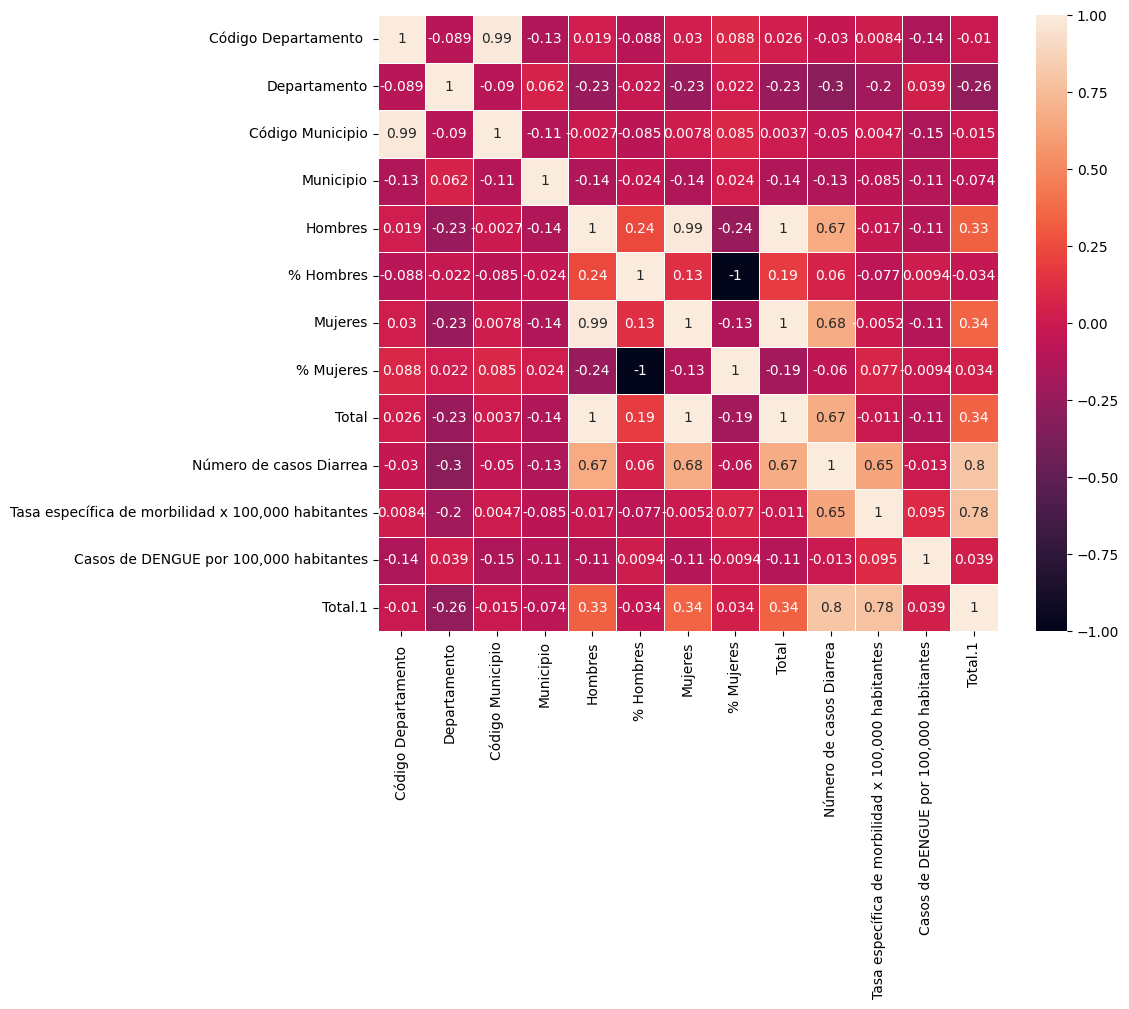

In [33]:
###Correlación

DiagCorr(dataNorm, 10, 8)

##pregunta de investigación: ¿Con que eficiencia es posible predecir la tasa de morbilidad por 100 mil habitantes
#teniendo en cuenta el total de enfermos por dengue y diarrea?

### **5. Revisión de Homoscedasticidad y Multicolinealidad ⛅**

In [34]:
###Aplicar el test de Breusch-Pagan
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X = dataNorm[['Total.1']]  # Cambia estos nombres por los de tus columnas
X = sm.add_constant(X)  # Añade una constante al modelo
y = dataNorm['Tasa específica de morbilidad x 100,000 habitantes']  # Cambia 'variable_dependiente' por el nombre de tu columna
modelo = sm.OLS(y, X).fit()

##se calcula el valor de P , si está por debajo de 0.05 existe evidencia de heteroscedasticidad
_, pvalue, _, _ = het_breuschpagan(modelo.resid, modelo.model.exog)
print('p-value:', pvalue)

p-value: 1.238348585768183e-47


In [38]:
# Aplicar transformación raíz cuadrada a la variable dependiente
dataNorm['variable_dependiente_sqr'] = np.sqrt(dataNorm['Tasa específica de morbilidad x 100,000 habitantes'])

# Seleccionar las variables
X = dataNorm[['Total.1']]  # ajusta el nombre según tus datos
y = dataNorm['variable_dependiente_sqr']

X = sm.add_constant(X)  # Añade una constante al modelo
modelo = sm.OLS(y, X).fit()

##se calcula el valor de P , si está por debajo de 0.05 existe evidencia de heteroscedasticidad
_, pvalue, _, _ = het_breuschpagan(modelo.resid, modelo.model.exog)
print('p-value:', pvalue)

##Presencia de Heteroscedasticidad afectando los valores de predicción del modelo, no es confiable.
##se aplicó la técnicas - OLS


p-value: 7.722367324343845e-14


In [39]:
##Revisión de Multicolinealidad - Si realmente las variables de X son independientes y que no este correlacionadas entre ellas.

"""
VIF=1 significa que no existe correlación entre esta variable independiente y cualquier otra.
1< VIF < 5 sugiere una correlación moderada pero no sería necesario resolverla.
VIF > 5 son niveles críticos de multicolinealidad.
"""
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

##Como conclusion la variable independiente Total.1 posee una buena tendencia a la predicción y es independiente de la predictora.
##se debe resolver el tema de la heteroscedasticidad, agregando más variables, eliminando variables o aplicando regresión ridge o lasso U OLS.
##se hará la regresión tradicional, error estándar robustos para comparar metricas inicialmente con un porcentaje 60% train y 40% test


   feature       VIF
0    const  1.470823
1  Total.1  1.000000


### **6. Partición del dataset y modelado de datos sin hiperparametrización y mejores características 🗽**

In [90]:
##Modelo 1: 60% train y 40% testeo = sin multicolinealidad y con heteroscedasticidad
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selección de la variable independiente (X) y dependiente (y)
X = dataNorm[['Total.1']]  # Cambia 'variable_independiente' por el nombre de tu columna
y = dataNorm['Tasa específica de morbilidad x 100,000 habitantes']       # Cambia 'variable_dependiente' por el nombre de tu columna

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Creación del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción con los datos de prueba
y_pred = modelo.predict(X_test)

# Cálculo de MSE y RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Cálculo de R^2
r2 = round(r2_score(y_test, y_pred),3)

# Mostrar las métricas
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 0.0015950986366368553
Root Mean Squared Error (RMSE): 0.03993868596532509
R^2 Score: 0.843


Conclusión del primer modelo: teniendo en cuenta la relación de 70% train - 30% testeo, 60% train - 40%test, 80% train - 20%test y 90% train - 10%test, se encontró una eficiencia de 0.84 entendiendo que de 100 casos posibles 84 van a ser predecidos de manera correcta frente a la tasa de morbilidad por diarrea en guatemala. Los valores actuales de los predecidos estan muy cerca con un valor de MSE de 0.0015, los cual se infiere que el modelo es estable en el tiempo.

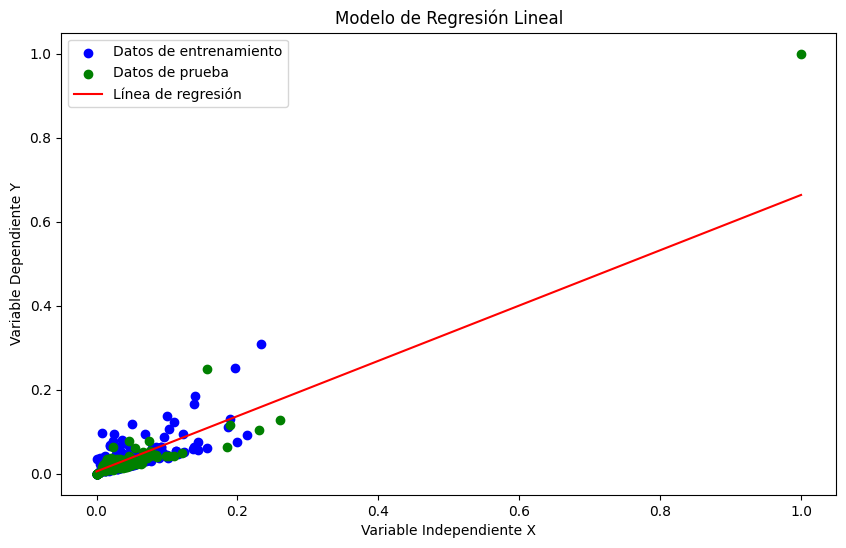

In [91]:
##graficar el modelo
X_range = pd.DataFrame(np.linspace(X.min(), X.max(), 100))  # Genera 100 puntos igualmente espaciados entre el mínimo y máximo de X
y_pred = modelo.predict(X_range)

# Graficar los datos originales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')  # Datos de entrenamiento
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')  # Datos de prueba
plt.plot(X_range, y_pred, color='red', label='Línea de regresión')  # Línea de regresión
plt.title('Modelo de Regresión Lineal')
plt.xlabel('Variable Independiente X')
plt.ylabel('Variable Dependiente Y')
plt.legend()
plt.show()

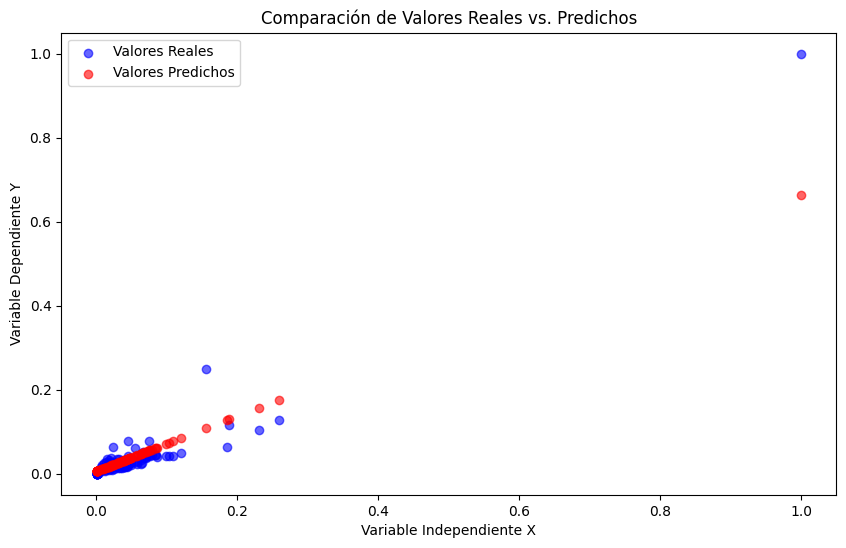

In [92]:
##Comparar los datos actuales de los predecidos
y_pred = modelo.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Valores Reales', alpha=0.6)  # Valores reales
plt.scatter(X_test, y_pred, color='red', label='Valores Predichos', alpha=0.6)  # Valores predichos
plt.title('Comparación de Valores Reales vs. Predichos')
plt.xlabel('Variable Independiente X')
plt.ylabel('Variable Dependiente Y')
plt.legend()
plt.show()

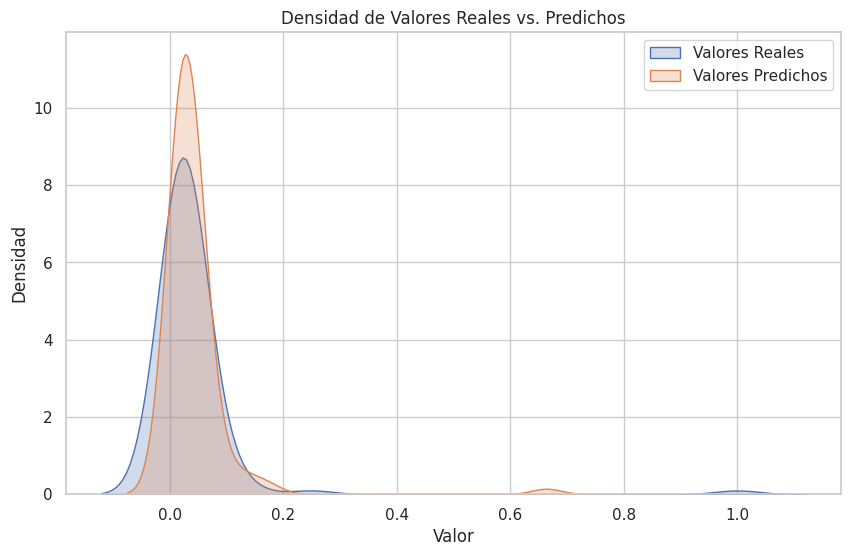

In [93]:
# Configuración del estilo del gráfico
sns.set(style='whitegrid')

# Crear el diagrama de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Valores Reales', fill=True)  # Densidad de los valores reales
sns.kdeplot(y_pred, label='Valores Predichos', fill=True)  # Densidad de los valores predichos
plt.title('Densidad de Valores Reales vs. Predichos')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [101]:
##Modelo 2 - Error estándar Robustos: 60% train y 40% testeo = sin multicolinealidad y sin heteroscedasticidad
import statsmodels.api as sm

# Asumiendo que 'weights' es una columna que representa los pesos inversos de la varianza de los errores
# Puedes estimar estos pesos o utilizar una proxy basada en el conocimiento del dominio
X = X_test #dataNorm[['Total.1']]
X = sm.add_constant(X)  # añadir intercepto
y = y_test#dataNorm['Tasa específica de morbilidad x 100,000 habitantes']

# Ajustar un modelo OLS regular
modelo_ols = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 es uno de los tipos de errores estándar robustos

# Mostrar resumen del modelo con errores estándar robustos
print(modelo_ols.summary())

X = X_test
X_pred = sm.add_constant(X)
y_pred = modelo_ols.predict(X_pred)


                                            OLS Regression Results                                            
Dep. Variable:     Tasa específica de morbilidad x 100,000 habitantes   R-squared:                       0.919
Model:                                                            OLS   Adj. R-squared:                  0.918
Method:                                                 Least Squares   F-statistic:                     5.442
Date:                                                Sat, 05 Apr 2025   Prob (F-statistic):             0.0217
Time:                                                        15:40:43   Log-Likelihood:                 217.71
No. Observations:                                                 102   AIC:                            -431.4
Df Residuals:                                                     100   BIC:                            -426.2
Df Model:                                                           1                                         
C

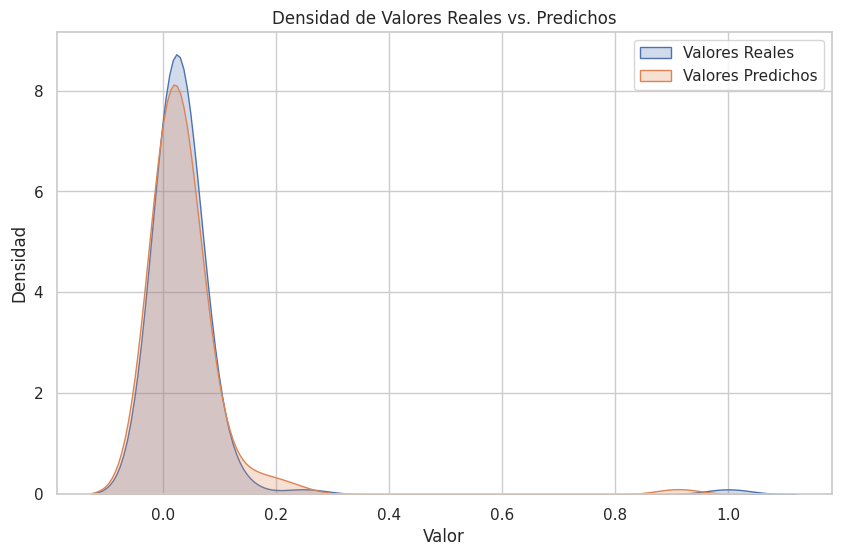

In [102]:
# Configuración del estilo del gráfico
sns.set(style='whitegrid')

# Crear el diagrama de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Valores Reales', fill=True)  # Densidad de los valores reales
sns.kdeplot(y_pred, label='Valores Predichos', fill=True)  # Densidad de los valores predichos
plt.title('Densidad de Valores Reales vs. Predichos')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

### **Regresión Lineal Múltiple 😋**

In [103]:
dataNorm.head()

,Código Departamento,Departamento,Código Municipio,Municipio,Hombres,% Hombres,Mujeres,% Mujeres,Total,Número de casos Diarrea,"Tasa específica de morbilidad x 100,000 habitantes","Casos de DENGUE por 100,000 habitantes",Total.1,variable_dependiente_sqr
0,0.142857,0.095238,0.177970,0.000000,0.022025,0.562500,0.020721,0.437500,0.021333,0.008041,0.020892,0.005540,0.038323,0.144540
1,1.000000,0.476190,0.994083,0.003003,0.014914,1.000000,0.009738,0.000000,0.012165,0.015286,0.063984,0.042889,0.032610,0.252951
2,0.571429,0.333333,0.594902,0.006006,0.049573,0.204545,0.060319,0.795455,0.055279,0.029154,0.031502,0.042889,0.071963,0.177487
3,0.380952,0.571429,0.406463,0.009009,0.015382,0.289773,0.018246,0.710227,0.016903,0.000787,0.002502,0.042889,0.003382,0.050024
4,0.095238,0.714286,0.133819,0.012012,0.031786,0.630682,0.028242,0.369318,0.029904,0.008420,0.016149,0.305369,0.014296,0.127078


In [104]:
dataNorm.drop(['variable_dependiente_sqr'], axis=1, inplace= True)

dataNorm.head()

,Código Departamento,Departamento,Código Municipio,Municipio,Hombres,% Hombres,Mujeres,% Mujeres,Total,Número de casos Diarrea,"Tasa específica de morbilidad x 100,000 habitantes","Casos de DENGUE por 100,000 habitantes",Total.1
0,0.142857,0.095238,0.177970,0.000000,0.022025,0.562500,0.020721,0.437500,0.021333,0.008041,0.020892,0.005540,0.038323
1,1.000000,0.476190,0.994083,0.003003,0.014914,1.000000,0.009738,0.000000,0.012165,0.015286,0.063984,0.042889,0.032610
2,0.571429,0.333333,0.594902,0.006006,0.049573,0.204545,0.060319,0.795455,0.055279,0.029154,0.031502,0.042889,0.071963
3,0.380952,0.571429,0.406463,0.009009,0.015382,0.289773,0.018246,0.710227,0.016903,0.000787,0.002502,0.042889,0.003382
4,0.095238,0.714286,0.133819,0.012012,0.031786,0.630682,0.028242,0.369318,0.029904,0.008420,0.016149,0.305369,0.014296


### **Paso 1: revisar la homoscedasticidad 🧑**

In [105]:
##revisión de la homoscedasticidad - varianza de los errores de los datos en el plano, dispersos, con patrones.
##Evalua: p_value este por encima de 0.05 = homoscedasticidad

X = dataNorm.drop(['Tasa específica de morbilidad x 100,000 habitantes'], axis=1)  # Cambia estos nombres por los de tus columnas

y = dataNorm['Tasa específica de morbilidad x 100,000 habitantes']

X = sm.add_constant(X)  # Añade una constante al modelo
modelo = sm.OLS(y, X).fit()

##se calcula el valor de P , si está por debajo de 0.05 existe evidencia de heteroscedasticidad
_, pvalue, _, _ = het_breuschpagan(modelo.resid, modelo.model.exog)
print('p-value:', pvalue)

#Por debajo de 0.05 el p_value: existe presencia de heteroscedasticidad. Se sugiere el modelo OLS.

p-value: 1.1644781133642432e-33


### **Paso 2: Revisar la multicolinealidad**

In [106]:
##Revisión de Multicolinealidad

"""
VIF=1 significa que no existe correlación entre esta variable independiente y cualquier otra.
1< VIF < 5 sugiere una correlación moderada pero no sería necesario resolverla.
VIF > 5 son niveles críticos de multicolinealidad.
"""
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

##de las variables independientes estudiadas, se presenta un caso alto multicolinealidad para codigo de departamento, cod municipio,
## numero de casos de diarrea. Si el problema no requiere de dicha data sería posible eliminarlas, si no es posible, se recomienda el modelos OLS.

                                   feature        VIF
0                                    const   0.000000
1                     Código Departamento   32.102544
2                             Departamento   1.088675
3                         Código Municipio  31.671132
4                                Municipio   1.100063
5                                  Hombres        inf
6                                % Hombres        inf
7                                  Mujeres        inf
8                                % Mujeres        inf
9                                    Total        inf
10                 Número de casos Diarrea   7.124671
11  Casos de DENGUE por 100,000 habitantes   1.108238
12                                 Total.1   1.421581


### **Paso 3: Modelo y métricas 🗽**

In [108]:
X

,const,Código Departamento,Departamento,Código Municipio,Municipio,Hombres,% Hombres,Mujeres,% Mujeres,Total,Número de casos Diarrea,"Casos de DENGUE por 100,000 habitantes",Total.1
0,1.0,0.142857,0.095238,0.177970,0.000000,0.022025,0.562500,0.020721,0.437500,0.021333,0.008041,0.005540,0.038323
1,1.0,1.000000,0.476190,0.994083,0.003003,0.014914,1.000000,0.009738,0.000000,0.012165,0.015286,0.042889,0.032610
2,1.0,0.571429,0.333333,0.594902,0.006006,0.049573,0.204545,0.060319,0.795455,0.055279,0.029154,0.042889,0.071963
3,1.0,0.380952,0.571429,0.406463,0.009009,0.015382,0.289773,0.018246,0.710227,0.016903,0.000787,0.042889,0.003382
4,1.0,0.095238,0.714286,0.133819,0.012012,0.031786,0.630682,0.028242,0.369318,0.029904,0.008420,0.305369,0.014296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1.0,0.619048,0.619048,0.629950,0.987988,0.054188,0.375000,0.057939,0.625000,0.056180,0.015558,0.000583,0.041349
336,1.0,1.000000,0.476190,0.996814,0.990991,0.007503,0.369318,0.008750,0.630682,0.008165,0.007099,0.175747,0.034342
337,1.0,0.142857,0.095238,0.179791,0.993994,0.026358,0.551136,0.024974,0.448864,0.025623,0.004157,0.042889,0.017916
338,1.0,0.380952,0.571429,0.407829,0.996997,0.010262,0.443182,0.010947,0.556818,0.010626,0.004487,0.042889,0.036963


In [109]:
##Eliminar las variables con un VIF Alto, si y solo si la problemática
X.drop(['Código Departamento ','Código Municipio','Número de casos Diarrea','const'], axis=1, inplace= True)

In [110]:
X.head()

,Departamento,Municipio,Hombres,% Hombres,Mujeres,% Mujeres,Total,"Casos de DENGUE por 100,000 habitantes",Total.1
0,0.095238,0.000000,0.022025,0.562500,0.020721,0.437500,0.021333,0.005540,0.038323
1,0.476190,0.003003,0.014914,1.000000,0.009738,0.000000,0.012165,0.042889,0.032610
2,0.333333,0.006006,0.049573,0.204545,0.060319,0.795455,0.055279,0.042889,0.071963
3,0.571429,0.009009,0.015382,0.289773,0.018246,0.710227,0.016903,0.042889,0.003382
4,0.714286,0.012012,0.031786,0.630682,0.028242,0.369318,0.029904,0.305369,0.014296


In [123]:
# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Creación del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción con los datos de prueba
y_pred = modelo.predict(X_test)

# Cálculo de MSE y RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Cálculo de R^2
r2 = round(r2_score(y_test, y_pred),3)

# Mostrar las métricas
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 0.0014741643234159562
Root Mean Squared Error (RMSE): 0.038394847615480336
R^2 Score: 0.855


In [131]:
3060*0.70

2142.0

In [124]:
X_train.shape

(238, 9)

In [125]:
y_train.shape

(238,)

In [126]:
X_test.shape

(102, 9)

In [127]:
y_test.shape

(102,)

<Axes: xlabel='Tasa específica de morbilidad x 100,000 habitantes', ylabel='Density'>

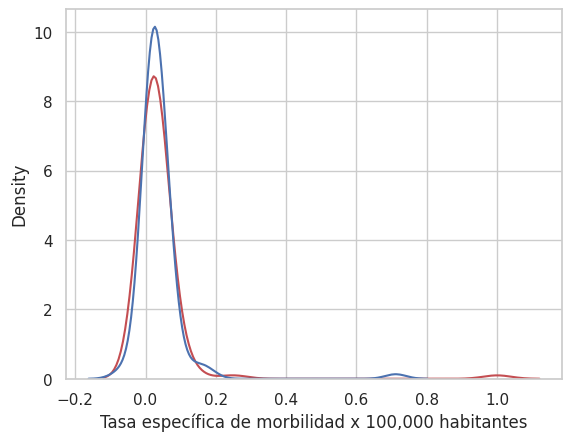

In [132]:
###tarea 1. Sacar la gráfica que permita ver el modelo en ejecucion (actuales vs predecidos)- muchas variables en X
##Arreglada la tarea
ax1 = sns.kdeplot(y_test, color='r', label='Valores actuales')
sns.kdeplot(y_pred, color='b', label='Valores predecidos')

In [ ]:
#Graficar el modelo con los datos actuales y predecidos - Tarea2

In [134]:
##Modelo 2 - Error estándar Robustos: 70% train y 30% testeo = sin multicolinealidad y sin heteroscedasticidad
import statsmodels.api as sm

# Asumiendo que 'weights' es una columna que representa los pesos inversos de la varianza de los errores
# Puedes estimar estos pesos o utilizar una proxy basada en el conocimiento del dominio
X = X_test #dataNorm[['Total.1']]
X = sm.add_constant(X)  # añadir intercepto
y = y_test#dataNorm['Tasa específica de morbilidad x 100,000 habitantes']

# Ajustar un modelo OLS regular
modelo_ols = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 es uno de los tipos de errores estándar robustos

# Mostrar resumen del modelo con errores estándar robustos
print(modelo_ols.summary())

"""
Se realizó una limpieza de datos utilizando la mediana en la columna de morbilidad, posteriormente, se realizó el test de normalidad
de shapiro-wilk, donde se evidencia la no presencia de normalidad. Esto sugiere que dichas variables presentan problemas de heteroscedasticidad y
multicolinealidad. Por tal motivo, se realizó el análisis de breusch-pagan donde se evidenció que las variables independientes presentaban
Heteroscedasticidad de 1,17e-33. Por otro lado, se realizó el test de VIF, identificando 3 variables críticas, como son cod departamento = 32,
cod municipio = 31, Dengue=7. Asi mismo, se sugiere, utilizar dos modelos, regresion lineal tradicional, Scikit learn y el modelo OLS de
la librerías stastmodels y se eliminó las variables con multicolinealidad alta.

Finalmente, para el modelo la mejor distribución de datos fue 70% train y 30% testeo. Con un modelo inicial con eficiencia de 0.85 y buen
resultado en el RMSE y MSE ambos cercanos a cero. Para el segundo modelo, Se aplicó el OLS donde identificó la multicolinealidad y la heteroscedasticidad
corrigiendola con el parámetro HC3 de covarianza de los datos, evidenciando una mejoría en el modelo 0,939 puntos porcentuales para un 94% de eficiencia. Es un modelo
estable y muy bueno para predecir la tasa de morbilidad con base en dichas variables de X y estable a futuro teniendo un R cuadrado ajustado
igual a la eficiencia.

Este modelo hace referencia a que de 100 datos de morbilidad es posible predecir 94 de manera eficiente.

"""

                                            OLS Regression Results                                            
Dep. Variable:     Tasa específica de morbilidad x 100,000 habitantes   R-squared:                       0.939
Model:                                                            OLS   Adj. R-squared:                  0.934
Method:                                                 Least Squares   F-statistic:                     23.81
Date:                                                Sat, 05 Apr 2025   Prob (F-statistic):           1.51e-19
Time:                                                        15:50:04   Log-Likelihood:                 231.96
No. Observations:                                                 102   AIC:                            -447.9
Df Residuals:                                                      94   BIC:                            -426.9
Df Model:                                                           7                                         
C

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  warnings.warn('covariance of constraints does not have full '


'\nSe realizó una limpieza de datos utilizando la mediana en la columna de morbilidad, posteriormente, se realizó el test de normalidad\nde shapiro-wilk, donde se evidencia la no presencia de normalidad. Esto sugiere que dichas variables presentan problemas de heteroscedasticidad y\nmulticolinealidad. Por tal motivo, se realizó el análisis de breusch-pagan donde se evidenció que las variables independientes presentaban\nHeteroscedasticidad de 1,17e-33. Por otro lado, se realizó el test de VIF, identificando 3 variables críticas, como son cod departamento = 32,\ncod municipio = 31, Dengue=7. Asi mismo, se sugiere, utilizar dos modelos, regresion lineal tradicional, Scikit learn y el modelo OLS de\nla librerías stastmodels y se eliminó las variables con multicolinealidad alta.\n\nFinalmente, para el modelo la mejor distribución de datos fue 70% train y 30% testeo. Con un modelo inicial con eficiencia de 0.85 y buen\nresultado en el RMSE y MSE ambos cercanos a cero. Para el segundo modelo

In [135]:
y_test #actuales

,"Tasa específica de morbilidad x 100,000 habitantes"
284,0.012954
116,0.249292
113,0.016738
42,0.053571
126,0.007264
...,...
194,0.063677
79,0.025137
321,0.032683
18,0.000000


In [136]:
y_pred # prediccion

array([ 0.01033666,  0.12225002,  0.00765727,  0.06569594,  0.01300557,
        0.00085548,  0.03141323,  0.06680957,  0.02103131,  0.01522949,
        0.03085647,  0.04021982,  0.06323794,  0.00916749,  0.02512618,
        0.143077  ,  0.01712348,  0.01282626,  0.06108739,  0.05263921,
        0.06921899,  0.02470019,  0.06342463,  0.04540167,  0.06759719,
        0.00753339,  0.03929095,  0.04324729,  0.01456844,  0.01852299,
        0.03104591,  0.08278936,  0.03155891,  0.01688653,  0.04803315,
        0.178014  ,  0.01098921,  0.05158068,  0.02116099,  0.01432948,
        0.01921912,  0.01192282,  0.02276997,  0.01840831,  0.02526184,
       -0.00637455,  0.00556423,  0.01499731,  0.04068594,  0.00465336,
        0.02812623,  0.02519556,  0.71137504,  0.04951721,  0.03711149,
        0.05937725,  0.03567692, -0.05255145,  0.02345829,  0.01060371,
        0.00631004,  0.00491654,  0.01486586,  0.00609408,  0.03609329,
        0.04983251, -0.07225748,  0.02049786,  0.05311732,  0.01